In [1]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix)
import xgboost as xgb

# Import optionnel pour Jupyter Notebook
from IPython.display import display

# Chargement des données
df = pd.read_csv("merged_data.csv")

# Aperçu initial des données
display(df.head())

print("\nInformations sur le dataframe:")
df.info()  # df.info() affiche directement les informations sur le DataFrame

print("\nStatistiques descriptives:")
display(df.describe(include='all'))


,_id_x,genre,age,nationalite,niveauEtudes,sessionId,__v_x,_id_y,textId,associationType,personAType,valueOneA,valueTwoA,forceA,personBType,valueOneB,valueTwoB,forceB,createdAt,__v_y
0,67e05b30dacaf24880d98fe8,homme,23,HRV,bac+4,420008aa-5136-48fb-9a6f-4347673fce87,0,67e05bb9dacaf24880d98feb,67a243ea6d8e29a001947946,risk-reward,Robot,8,5,8,Personne âgée,2,5,3,2025-03-23T19:06:33.515Z,0
1,67e05b30dacaf24880d98fe8,homme,23,HRV,bac+4,420008aa-5136-48fb-9a6f-4347673fce87,0,67e05c02dacaf24880d98fed,67a243ea6d8e29a001947945,risk-reward,Femme petite taille,4,7,5,Robot,6,3,8,2025-03-23T19:07:46.725Z,0
2,67e05b30dacaf24880d98fe8,homme,23,HRV,bac+4,420008aa-5136-48fb-9a6f-4347673fce87,0,67e05c25dacaf24880d98fef,67a51efa18a0dfe14aac016b,risk-effort,Enfant,5,3,3,Femme petite taille,5,7,5,2025-03-23T19:08:21.185Z,0
3,67e05b30dacaf24880d98fe8,homme,23,HRV,bac+4,420008aa-5136-48fb-9a6f-4347673fce87,0,67e05c33dacaf24880d98ff1,67a243ea6d8e29a001947947,effort-reward,Enfant,3,3,3,Femme petite taille,7,7,5,2025-03-23T19:08:35.846Z,0
4,67e05b30dacaf24880d98fe8,homme,23,HRV,bac+4,420008aa-5136-48fb-9a6f-4347673fce87,0,67e05c4bdacaf24880d98ff3,67a243ea6d8e29a001947949,effort-reward,Femme grande taille,5,5,7,Homme petite taille,5,5,6,2025-03-23T19:08:59.087Z,0



Informations sur le dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id_x            1260 non-null   object
 1   genre            1260 non-null   object
 2   age              1260 non-null   int64 
 3   nationalite      1260 non-null   object
 4   niveauEtudes     1260 non-null   object
 5   sessionId        1260 non-null   object
 6   __v_x            1260 non-null   int64 
 7   _id_y            1260 non-null   object
 8   textId           1260 non-null   object
 9   associationType  1260 non-null   object
 10  personAType      1260 non-null   object
 11  valueOneA        1260 non-null   int64 
 12  valueTwoA        1260 non-null   int64 
 13  forceA           1260 non-null   int64 
 14  personBType      1260 non-null   object
 15  valueOneB        1260 non-null   int64 
 16  valueTwoB        1260 non-null   int64 
 17  f

,_id_x,genre,age,nationalite,niveauEtudes,sessionId,__v_x,_id_y,textId,associationType,personAType,valueOneA,valueTwoA,forceA,personBType,valueOneB,valueTwoB,forceB,createdAt,__v_y
count,1260,1260,1260.000000,1260,1260,1260,1260.0,1260,1260,1260,1260,1260.000000,1260.000000,1260.000000,1260,1260.000000,1260.000000,1260.000000,1260,1260.0
unique,87,2,NaN,12,8,83,NaN,1175,9,3,7,NaN,NaN,NaN,7,NaN,NaN,NaN,1175,NaN
top,67e1e6820d317b27f485834d,homme,NaN,FRA,bac+3,605fd6d1-1b81-4bc0-b3a1-0906822f7568,NaN,67e1ef76c286748200d3786d,67a243ea6d8e29a001947949,effort-reward,Robot,NaN,NaN,NaN,Femme petite taille,NaN,NaN,NaN,2025-03-24T23:49:10.554Z,NaN
freq,32,720,NaN,476,519,52,NaN,2,170,434,208,NaN,NaN,NaN,199,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,24.788095,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.007937,4.885714,5.477778,NaN,4.992063,5.114286,5.407143,NaN,0.0
std,NaN,NaN,9.451201,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.712885,2.517223,2.747282,NaN,2.712885,2.517223,2.727225,NaN,0.0
min,NaN,NaN,12.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,1.000000,NaN,0.0
25%,NaN,NaN,20.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.000000,4.000000,3.000000,NaN,3.000000,4.000000,3.000000,NaN,0.0
50%,NaN,NaN,22.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.000000,5.000000,6.000000,NaN,5.000000,5.000000,6.000000,NaN,0.0
75%,NaN,NaN,25.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.000000,6.000000,8.000000,NaN,7.000000,6.000000,8.000000,NaN,0.0


In [2]:

df_bin = df.copy()
df_bin.drop(columns=["createdAt"], inplace=True)


# Créer une seule colonne 'association_triplet' au lieu de 3 colonnes binaires
def convertir_en_triplet(row):
    return [
        1 if "effort" in row["associationType"] else 0,
        1 if "risk" in row["associationType"] else 0,
        1 if "reward" in row["associationType"] else 0,
    ]

df_bin["association_triplet"] = df_bin.apply(convertir_en_triplet, axis=1)

# Séparer les features (X) et les cibles (y)
X = df_bin[["genre", "age", "nationalite", "niveauEtudes", "personAType", "personBType"]]
y = pd.DataFrame(df_bin["association_triplet"].tolist(), columns=["effort", "risque", "reward"]).astype(int)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement : encodage + normalisation
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), ["age"]),
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["genre", "nationalite", "niveauEtudes", "personAType", "personBType"])
])

# Modèle
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
multioutput_model = MultiOutputClassifier(base_model)

# Pipeline complet
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", multioutput_model)
])

# Entraînement
pipeline.fit(X_train, y_train)

# Évaluation
y_pred = pipeline.predict(X_test)
for i, col in enumerate(["effort", "risque", "reward"]):
    print(f"\n📊 Évaluation du modèle pour la cible : {col.upper()}")
    
    y_true = y_test[col]
    y_hat = y_pred[:, i]
    
    acc = accuracy_score(y_true, y_hat)
    prec = precision_score(y_true, y_hat, zero_division=0)
    rec = recall_score(y_true, y_hat, zero_division=0)
    f1 = f1_score(y_true, y_hat, zero_division=0)
    cm = confusion_matrix(y_true, y_hat)
    
    print(f"🔹 Accuracy     : {acc:.2f}")
    print(f"🔹 Précision    : {prec:.2f}")
    print(f"🔹 Rappel       : {rec:.2f}")
    print(f"🔹 F1-score     : {f1:.2f}")
    print(f"🔹 Matrice de confusion :\n{cm}")



📊 Évaluation du modèle pour la cible : EFFORT
🔹 Accuracy     : 0.65
🔹 Précision    : 0.68
🔹 Rappel       : 0.86
🔹 F1-score     : 0.76
🔹 Matrice de confusion :
[[ 28  65]
 [ 23 136]]

📊 Évaluation du modèle pour la cible : RISQUE
🔹 Accuracy     : 0.67
🔹 Précision    : 0.72
🔹 Rappel       : 0.84
🔹 F1-score     : 0.78
🔹 Matrice de confusion :
[[ 26  55]
 [ 28 143]]

📊 Évaluation du modèle pour la cible : REWARD
🔹 Accuracy     : 0.62
🔹 Précision    : 0.71
🔹 Rappel       : 0.77
🔹 F1-score     : 0.74
🔹 Matrice de confusion :
[[ 23  55]
 [ 40 134]]


In [3]:
df_bin.head()
df_bin.to_csv("df_bin.csv", index=False)

/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:10:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:10:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:10:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:10:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

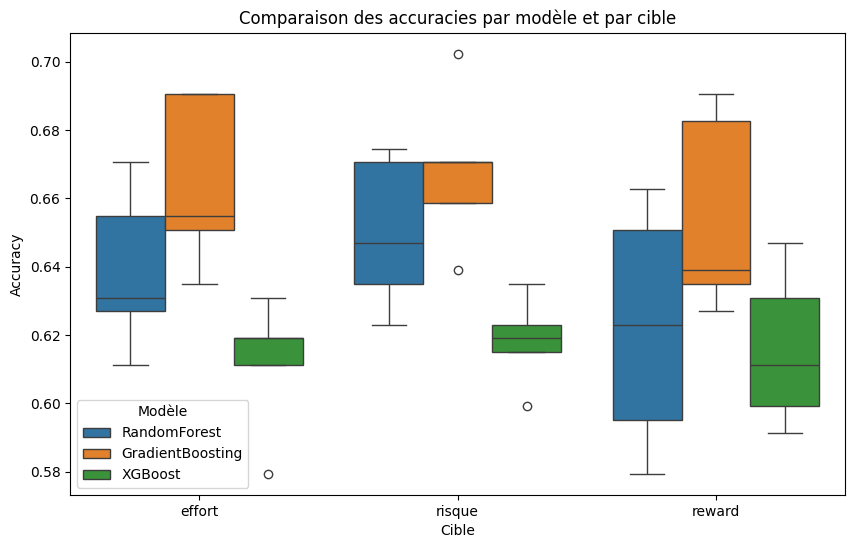


Modèle : RandomForest
  effort : 0.64 ± 0.02
  risque : 0.65 ± 0.02
  reward : 0.62 ± 0.03

Modèle : GradientBoosting
  effort : 0.66 ± 0.02
  risque : 0.67 ± 0.02
  reward : 0.65 ± 0.03

Modèle : XGBoost
  effort : 0.61 ± 0.02
  risque : 0.62 ± 0.01
  reward : 0.62 ± 0.02


In [4]:

# On suppose que df_bin, X et y sont déjà définis comme dans votre snippet initial
# Exemple de X et y :
# X = df_bin[["genre", "age", "nationalite", "niveauEtudes", "personAType", "personBType"]]
# y = pd.DataFrame(df_bin["association_triplet"].tolist(), columns=["effort", "risque", "reward"]).astype(int)

# Prétraitement commun
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), ["age"]),
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["genre", "nationalite", "niveauEtudes", "personAType", "personBType"])
])

# Validation croisée : 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionnaires pour stocker les scores par modèle et par cible
scores_rf = {"effort": [], "risque": [], "reward": []}
scores_gb = {"effort": [], "risque": [], "reward": []}
scores_xgb = {"effort": [], "risque": [], "reward": []}

# Boucle sur les folds
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Pipeline RandomForest
    pipeline_rf = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))
    ])
    
    # Pipeline GradientBoosting
    pipeline_gb = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", MultiOutputClassifier(GradientBoostingClassifier(random_state=42)))
    ])
    
    # Pipeline XGBoost
    pipeline_xgb = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", MultiOutputClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)))
    ])
    
    # Entraînement et prédictions
    pipeline_rf.fit(X_train_fold, y_train_fold)
    pipeline_gb.fit(X_train_fold, y_train_fold)
    pipeline_xgb.fit(X_train_fold, y_train_fold)
    
    y_pred_rf = pipeline_rf.predict(X_test_fold)
    y_pred_gb = pipeline_gb.predict(X_test_fold)
    y_pred_xgb = pipeline_xgb.predict(X_test_fold)
    
    # Calcul de l'accuracy pour chaque cible
    for i, target in enumerate(["effort", "risque", "reward"]):
        scores_rf[target].append(accuracy_score(y_test_fold[target], y_pred_rf[:, i]))
        scores_gb[target].append(accuracy_score(y_test_fold[target], y_pred_gb[:, i]))
        scores_xgb[target].append(accuracy_score(y_test_fold[target], y_pred_xgb[:, i]))

# Réorganisation des résultats dans un DataFrame pour le boxplot
data = []
for model_name, scores in zip(["RandomForest", "GradientBoosting", "XGBoost"], 
                              [scores_rf, scores_gb, scores_xgb]):
    for target in ["effort", "risque", "reward"]:
        for score in scores[target]:
            data.append({"Modèle": model_name, "Cible": target, "Accuracy": score})
df_scores = pd.DataFrame(data)

# Affichage du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cible", y="Accuracy", hue="Modèle", data=df_scores)
plt.title("Comparaison des accuracies par modèle et par cible")
plt.show()

# Affichage des moyennes et écarts types
for model_name, scores in zip(["RandomForest", "GradientBoosting", "XGBoost"], 
                              [scores_rf, scores_gb, scores_xgb]):
    print(f"\nModèle : {model_name}")
    for target in ["effort", "risque", "reward"]:
        mean = np.mean(scores[target])
        std = np.std(scores[target])
        print(f"  {target} : {mean:.2f} ± {std:.2f}")


/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:11:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:11:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:11:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/salhinina/Desktop/mon_env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:11:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

Aperçu des résultats de précision agrégée par sous-groupe :


,Model,Group_Var,Group,Precision,Group_Size
0,RandomForest,genre,femme,0.668866,99
1,RandomForest,genre,homme,0.723588,153
2,RandomForest,age_range,10-14,0.611111,4
3,RandomForest,age_range,15-19,0.699537,23
4,RandomForest,age_range,20-24,0.678123,161


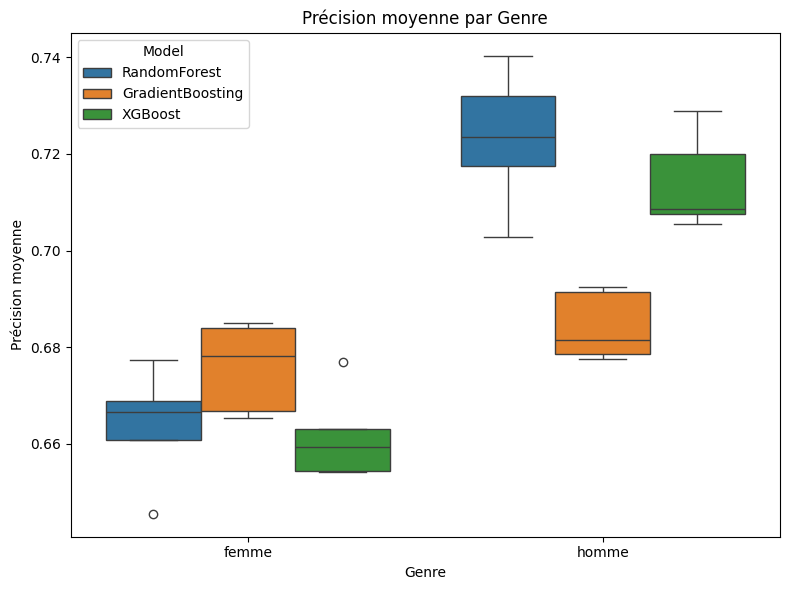

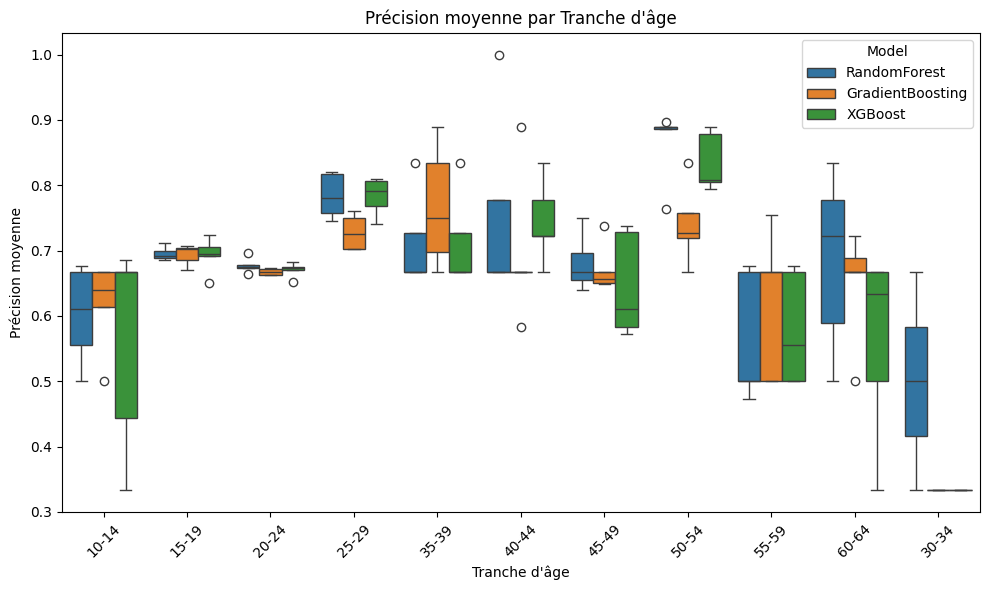

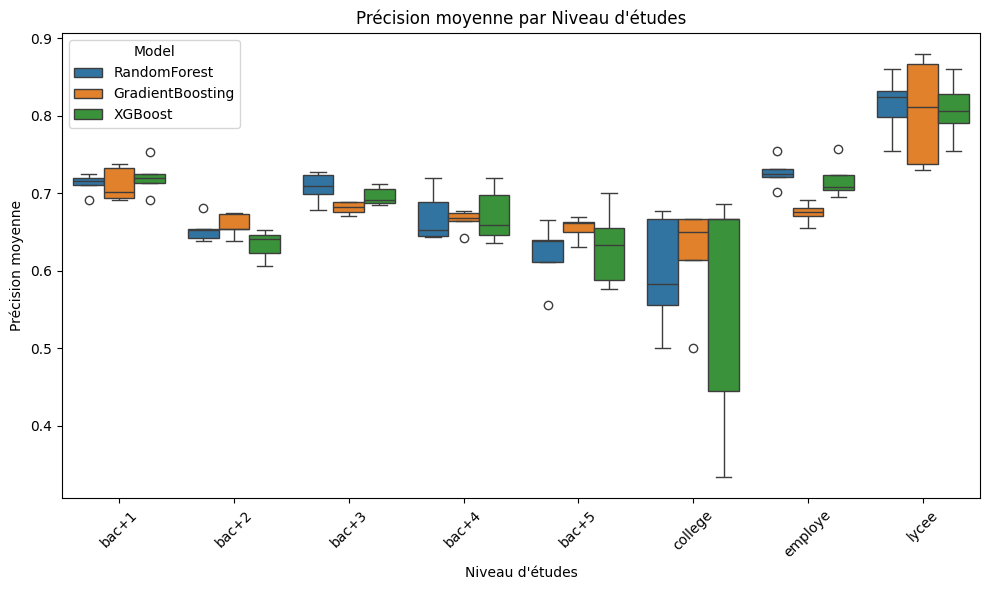

In [5]:

# On suppose que df_bin, X et y sont déjà définis :
# X = df_bin[["genre", "age", "nationalite", "niveauEtudes", "personAType", "personBType"]]
# y = pd.DataFrame(df_bin["association_triplet"].tolist(), 
#                  columns=["effort", "risque", "reward"]).astype(int)

# Création d'une colonne "age_range" dans X (pour la visualisation ultérieure)
X = X.copy()
X["age_range"] = X["age"].apply(lambda a: f"{(a//5)*5}-{(a//5)*5+4}")

# Prétraitement commun
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), ["age"]),
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["genre", "nationalite", "niveauEtudes", "personAType", "personBType"])
])

# Validation croisée : 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Liste pour stocker les résultats de précision agrégée par sous-groupe
results_list = []

# On calcule la précision moyenne sur les 3 cibles
target_names = ["effort", "risque", "reward"]

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index].copy(), X.iloc[test_index].copy()
    y_train_fold, y_test_fold = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    # Définir les pipelines pour chaque modèle
    pipeline_rf = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))
    ])
    pipeline_gb = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", MultiOutputClassifier(GradientBoostingClassifier(random_state=42)))
    ])
    pipeline_xgb = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", MultiOutputClassifier(xgb.XGBClassifier(use_label_encoder=False, 
                                                            eval_metric='logloss', 
                                                            random_state=42)))
    ])
    
    # Entraînement
    pipeline_rf.fit(X_train_fold, y_train_fold)
    pipeline_gb.fit(X_train_fold, y_train_fold)
    pipeline_xgb.fit(X_train_fold, y_train_fold)
    
    # Prédictions sur le fold test
    y_pred_rf = pipeline_rf.predict(X_test_fold)
    y_pred_gb = pipeline_gb.predict(X_test_fold)
    y_pred_xgb = pipeline_xgb.predict(X_test_fold)
    
    # Pour chaque modèle, on ajoute les résultats au DataFrame temporaire
    for model_name, y_pred in zip(["RandomForest", "GradientBoosting", "XGBoost"],
                                  [y_pred_rf, y_pred_gb, y_pred_xgb]):
        df_fold = X_test_fold.copy()
        # Ajout des colonnes de prédictions et de vérité pour chaque cible
        for i, target in enumerate(target_names):
            df_fold[f"true_{target}"] = y_test_fold[target].values
            df_fold[f"pred_{target}"] = y_pred[:, i]
        
        # Pour chaque variable de regroupement
        for group_var in ["genre", "age_range", "niveauEtudes"]:
            groups = df_fold.groupby(group_var)
            for group_val, group_df in groups:
                # Calculer la précision pour chaque target puis faire la moyenne
                precisions = []
                for target in target_names:
                    prec = precision_score(group_df[f"true_{target}"], group_df[f"pred_{target}"], zero_division=0)
                    precisions.append(prec)
                avg_prec = np.mean(precisions)
                results_list.append({
                    "Model": model_name,
                    "Group_Var": group_var,
                    "Group": group_val,
                    "Precision": avg_prec,
                    "Group_Size": len(group_df)
                })

# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results_list)

# Afficher un aperçu des résultats
print("Aperçu des résultats de précision agrégée par sous-groupe :")
display(df_results.head())

# Graphique 1 : Comparaison de la précision par genre
plt.figure(figsize=(8,6))
sns.boxplot(data=df_results[df_results["Group_Var"]=="genre"], x="Group", y="Precision", hue="Model")
plt.title("Précision moyenne par Genre")
plt.xlabel("Genre")
plt.ylabel("Précision moyenne")
plt.tight_layout()
plt.show()

# Graphique 2 : Comparaison de la précision par tranche d'âge
plt.figure(figsize=(10,6))
sns.boxplot(data=df_results[df_results["Group_Var"]=="age_range"], x="Group", y="Precision", hue="Model")
plt.title("Précision moyenne par Tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Précision moyenne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graphique 3 : Comparaison de la précision par niveau d'études
plt.figure(figsize=(10,6))
sns.boxplot(data=df_results[df_results["Group_Var"]=="niveauEtudes"], x="Group", y="Precision", hue="Model")
plt.title("Précision moyenne par Niveau d'études")
plt.xlabel("Niveau d'études")
plt.ylabel("Précision moyenne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


#séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Report (effort, risque, reward) :
              precision    recall  f1-score   support

      effort       0.68      0.85      0.75       159
      risque       0.72      0.83      0.77       171
      reward       0.70      0.77      0.73       174

   micro avg       0.70      0.82      0.75       504
   macro avg       0.70      0.82      0.75       504
weighted avg       0.70      0.82      0.75       504
 samples avg       0.71      0.82      0.75       504



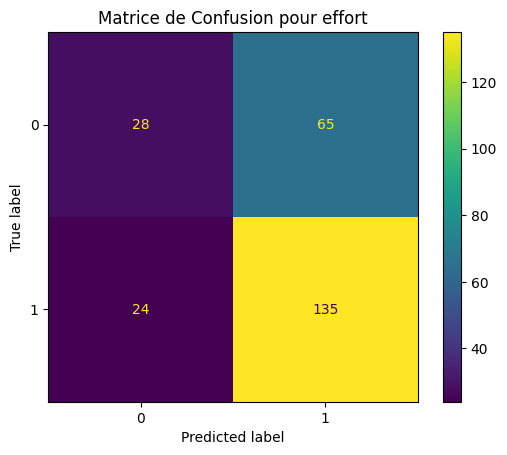

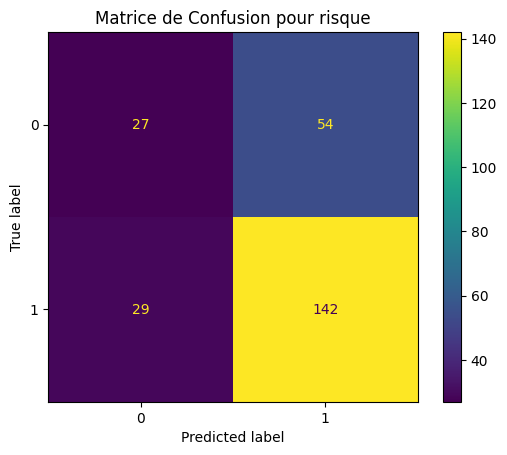

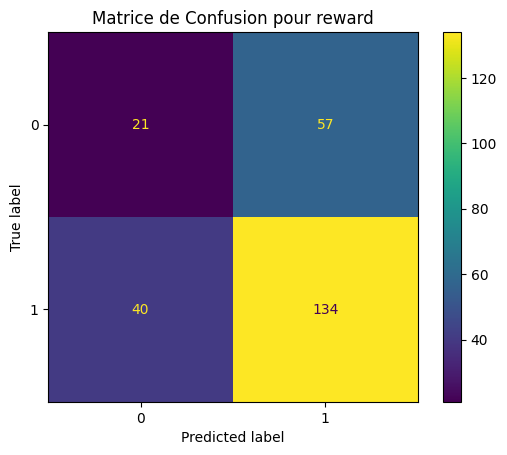

In [9]:
# Préparation du pré-traitement
numeric_features = ["age"]
categorical_features = ["genre", "nationalite", "niveauEtudes", "personAType", "personBType"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Création du pipeline avec un RandomForestClassifier
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Entraînement du modèle
model.fit(X_train, y_train)

# Évaluation sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage du rapport de classification pour chaque label
print("Classification Report (effort, risque, reward) :")
print(classification_report(y_test, y_pred, target_names=["effort", "risque", "reward"]))

# Matrices de confusion pour chaque sortie
for i, label in enumerate(["effort", "risque", "reward"]):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])
    disp.plot()
    plt.title(f"Matrice de Confusion pour {label}")
    plt.show()